In [13]:
# start
import operator
import math
import pandas as pd
import numpy as np
data=pd.read_csv(r"C:\Users\ankur\Downloads\data.csv")

    
def attribute_type(att):
    att_type=[]
    for i in att:
        k=i.find(':c')
        l=i.find(':n')
        att_type.append(k>1)
    return att_type
# sorting 
def pre_sorting_attributes(df):
    attributes = df.columns.tolist()
    attributetype = attribute_type(attributes)
    loa = len(attributes)
    sorted_attributes = [[] for i in range(loa-1)]
    for k in range(loa-1):
        if(attributetype[k] == 0):                 #if numerical attribute then sort it
            for i in range (len(df)):
                row = [df[attributes[k]][i], i]
                sorted_attributes[k].append(row)
            sorted_attributes[k] = sorted(sorted_attributes[k], key = operator.itemgetter(0))
            
    return sorted_attributes


#node
class node():

    def __init__(self,label="root", histogram=[], left=None, right=None):
        self.identity = label
        self.classfreq = histogram 
        self.left = left
        self.right = right
        self.best_split = 0
        
    def display_node(self):
        print("node name:",self.identity,"\nclass_frequency for the node:",self.classfreq)
        
    
    def create_leftchild(self, label, histogram):
        child = node(label, histogram)
        self.left = child
        return child
        
    def create_rightchild(self, label, histogram):
        child = node(label, histogram)
        self.right = child
        return child
        
    def check_ifleaf(self):
        if(self.left == None and self.right == None):
            return 1
        else:
            return 0
        
    def set_best_split(self, best_split):
        self.best_split = best_split
        
    def get_best_split(self):
        return(self.best_split)
    
    def get_pure_class(self):             # checks if it is a pure node and returns the class type  for the pure node
        from collections import Counter
        histogram = self.classfreq
        return([k for k,v in histogram.most_common()][0])


def update_classlist(df, leaf = None):
    classlist=[]
    attributes=df.columns.tolist()
    noa = len(attributes)
    for i in range(len(df)):
        row = [df[attributes[noa-1]][i], leaf]
        classlist.append(row)
    return classlist

def gini_calculate(p1, p2):
    gini_1=1
    gini_2=1
    histogram_p1=get_histogram(p1)
    histogram_p2=get_histogram(p2)
    gini_1 -= sum(map(lambda x:x*x,[(histogram_p1[i])/len(p1) for i in histogram_p1]))
    gini_2 -= sum(map(lambda x:x*x,[(histogram_p2[i])/len(p2) for i in histogram_p2]))
    gini=(len(p1)*(gini_1)/(len(p1)+len(p2)))+(len(p2)*(gini_2)/(len(p1)+len(p2)))
    #print(gini)
    return [gini,gini_1,gini_2]

def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

def gini_rootnode(classlist):
    gini=1
    histogram_root=get_histogram(classlist)
    gini-=sum(map(lambda x:x*x,[(histogram_root[i])/len(classlist) for i in histogram_root]))
    return gini

def getsplit1 (df,node='root'):
    attributes=df.columns.tolist()
    #print(attributes)
    attlist=pre_sorting_attributes(df)
    #print(attlist)
    classlist=update_classlist(df,node)
    print(classlist)
    if(gini_rootnode(classlist)==0):
        return 
    minimum_gini=math.inf   # at each split minimum_gini gets updated ..at end if att1 traversl we have best split
    best_split=0 # at end of traversal of att1 .. best_split has where the split has too happen
    for i in range(len(df)-1):
        #groups = test_split(i, row[index], df)
        partition_1=[classlist[j]for j in list(attlist[0][k][1] for k in list(range(0,i+1)))]
        print(partition_1)
        partition_2=[classlist[j]for j in list(attlist[0][k][1] for k in list(range(i+1,len(df))))]
        print(partition_2)
        GINI=gini_calculate(partition_1,partition_2)
        #print(GINI)
        gini_split=GINI[0]
        if(gini_split< minimum_gini):
            minimum_gini=gini_split
            best_split=i
           # b_index, b_value, b_score, b_groups = i, row[index], gini, groups
    #minimum_gini -best split for attribute1
    print("best split happens at", attributes[0],"=",attlist[0][best_split])
    for row in dataset:
        groups = test_split(i, row[i], df.values)
    
        
    #return best_split
    return {'index':b_index, 'value':b_value, 'groups':b_groups}
    
    

def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}


def create_sublist(indices,q,attlist):
    list1=[]
    list2=[attlist[q][k][1] for k in range(len(df))]
    for i in indices:
        list1.append(list2.index(i))
    list1=sorted(list1)
    return([attlist[1][k] for k in list1])

def PARTITION(node, max_depth, min_size, depth):
#     P1=[classlist[j] for j in [a[i] for j in attlist[k][1] for k in list(range(o,i+1))]]
#     P2=[classlist[j] for j in [a[i] for j in attlist[k][1] for k in list(range(i+1,len(+1))]]
#     GINI=gini_calculate(partition_1,partition_2)
#                                                                          gini_split
    
    
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        PARTITION(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        PARTITION(node['right'], max_depth, min_size, depth+1)
    
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right



# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}
    

def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

def get_histogram(classlist):
    from collections import Counter
    hosto=Counter(classlist[i][0] for i in range(len(classlist)))
    return hosto
    
    
def updateclasslist2(partition,nodes):
    for k in range(len(partition)):
        partition[k][1]=nodes
    return partition
    
def print_tree(node, depth=0):
    if isinstance(node, dict):
       # print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))

In [14]:
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)


# Build a decision tree
def make_tree(train, max_depth, min_size):
    root = get_split(train)
    PARTITION(root, max_depth, min_size, 1)
    return root


In [30]:
#training data
import pandas as pd
import sklearn
#def train():
data=pd.read_csv(r"C:\Users\ankur\Downloads\data.csv")
dataset=data.values
tree = make_tree(dataset, 2, 3)

Y=data["Label"]
X=data.drop(["Label"],axis=1)
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Y,random_state=1)

print(len(x_train),len(y_train))


X1 < 0.000 Gini=0.500
X1 < 1.000 Gini=0.495
X1 < 2.000 Gini=0.500
X1 < 3.000 Gini=0.498
X1 < 4.000 Gini=0.495
X1 < 5.000 Gini=0.491
X1 < 6.000 Gini=0.496
X1 < 7.000 Gini=0.499
X1 < 8.000 Gini=0.497
X1 < 9.000 Gini=0.495
X1 < 10.000 Gini=0.498
X1 < 11.000 Gini=0.495
X1 < 12.000 Gini=0.498
X1 < 13.000 Gini=0.500
X1 < 14.000 Gini=0.500
X1 < 15.000 Gini=0.500
X1 < 16.000 Gini=0.500
X1 < 17.000 Gini=0.500
X1 < 18.000 Gini=0.500
X1 < 19.000 Gini=0.500
X1 < 20.000 Gini=0.500
X1 < 21.000 Gini=0.500
X1 < 22.000 Gini=0.499
X1 < 23.000 Gini=0.500
X1 < 24.000 Gini=0.500
X1 < 25.000 Gini=0.500
X1 < 26.000 Gini=0.500
X1 < 27.000 Gini=0.500
X1 < 28.000 Gini=0.500
X1 < 29.000 Gini=0.500
X1 < 30.000 Gini=0.500
X1 < 31.000 Gini=0.500
X1 < 32.000 Gini=0.500
X1 < 33.000 Gini=0.500
X1 < 34.000 Gini=0.499
X1 < 35.000 Gini=0.500
X1 < 36.000 Gini=0.499
X1 < 37.000 Gini=0.500
X1 < 38.000 Gini=0.500
X1 < 39.000 Gini=0.500
X1 < 40.000 Gini=0.500
X1 < 41.000 Gini=0.500
X1 < 42.000 Gini=0.500
X1 < 43.000 Gini=0.50

In [31]:
print_tree(tree)
from matplotlib import pyplot as plt
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=2)
clf = clf.fit(x_train, y_train)

  [0.0]
  [0.0]
  [1.0]
  [0.0]


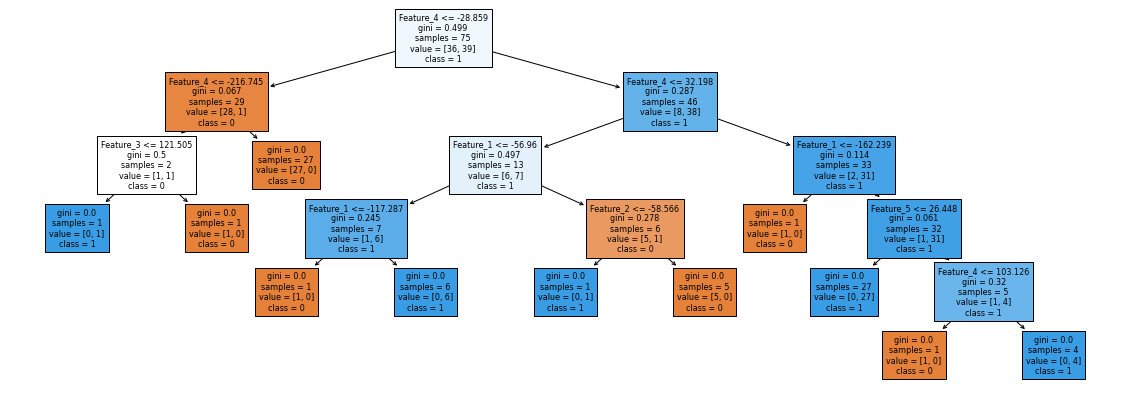

In [32]:
plt.figure(figsize=(20,7))
tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=["0","1"],
                   filled=True,fontsize=8)
plt.savefig("tree",dpi=100)

In [35]:
#test
y_pred=clf.predict(x_test)
#accuracy
clf.score(x_test,y_test)

0.8